# Business Problem UnderStanding
Dream Housing Finance company deals in all kinds of home loans. They have presence across all urban, semi urban and rural areas. Customer first applies for home loan and after that company validates the customer eligibility for loan. 

Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling  online application form. These details are Gender, Marital Status,Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have provided a dataset to identify the customers segments that are eligible for loan amount so that they can specifically target these customers.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter('ignore')

# UnderStanding the Data

In [2]:
data = pd.read_csv("D://downloads//LoanData.csv")
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [4]:
# Lets check the unique column name for the description
data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

### DataSet Understanding

* LoanID: Unique loan ID
* Gender : Male / Female
* Married : Person is married or not
* Dependents : How many peoples are depend on the income of that person
* Education : How much person has studied (Gratuated / Not)
* Self_Employed : whether the person is doing the business of his / her own or not
* ApplicantIncome : What is the salary of the person taking the loan
* CoapplicantIncome : If the two persons are taking the loan together what is the his/her income
* LoanAmount : How much loan is he taking in terms of thousands of dollars.
* Loan_Amount_Term : Term of the loan in months
* Credit_History : This is the amount that the loan is going upon you.
* Property_Area : The property he ows is in which area
* Loan_Status : Loan is approved or not (**Output Variable**)

In [5]:
data['Loan_ID'].unique()

array(['LP001002', 'LP001003', 'LP001005', 'LP001006', 'LP001008',
       'LP001011', 'LP001013', 'LP001014', 'LP001018', 'LP001020',
       'LP001024', 'LP001027', 'LP001028', 'LP001029', 'LP001030',
       'LP001032', 'LP001034', 'LP001036', 'LP001038', 'LP001041',
       'LP001043', 'LP001046', 'LP001047', 'LP001050', 'LP001052',
       'LP001066', 'LP001068', 'LP001073', 'LP001086', 'LP001087',
       'LP001091', 'LP001095', 'LP001097', 'LP001098', 'LP001100',
       'LP001106', 'LP001109', 'LP001112', 'LP001114', 'LP001116',
       'LP001119', 'LP001120', 'LP001123', 'LP001131', 'LP001136',
       'LP001137', 'LP001138', 'LP001144', 'LP001146', 'LP001151',
       'LP001155', 'LP001157', 'LP001164', 'LP001179', 'LP001186',
       'LP001194', 'LP001195', 'LP001197', 'LP001198', 'LP001199',
       'LP001205', 'LP001206', 'LP001207', 'LP001213', 'LP001222',
       'LP001225', 'LP001228', 'LP001233', 'LP001238', 'LP001241',
       'LP001243', 'LP001245', 'LP001248', 'LP001250', 'LP0012

In [6]:
print(len(data['Loan_ID'].unique()))
print(data['Loan_ID'].nunique())

614
614


In [7]:
data.drop(columns = ['Loan_ID'], inplace = True)

In [8]:
print("No of unique values in Gender :",data["Gender"].unique()) 
# discrete categorical ordianal variable

No of unique values in Gender : ['Male' 'Female' nan]


In [9]:
data.Gender.value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [10]:
print("No of unique values in married is :",data['Married'].unique())
# categorical

No of unique values in married is : ['No' 'Yes' nan]


In [11]:
data['Married'].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [12]:
print("No of unique Values in dependents :",data['Dependents'].unique()) # count

No of unique Values in dependents : ['0' '1' '2' '3+' nan]


In [13]:
data['Dependents'].value_counts()
# here there is wrong data i.e., 3+
# here basically it is discrete count variable i.e., it is must be in int but it is in object

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [14]:
print("No of unique values in Self_Employed :", data['Self_Employed'].unique())

No of unique values in Self_Employed : ['No' 'Yes' nan]


In [15]:
data['Self_Employed'].value_counts() # categorical

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [16]:
data['Education'].unique() # categorical

array(['Graduate', 'Not Graduate'], dtype=object)

In [17]:
data['Education'].value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

In [18]:
data['Loan_Amount_Term'].unique() # count

array([360., 120., 240.,  nan, 180.,  60., 300., 480.,  36.,  84.,  12.])

In [19]:
data['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [20]:
data['Property_Area'].unique() # categorical

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

In [21]:
data['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

In [22]:
data['Loan_Status'].unique() # categorical

array(['Y', 'N'], dtype=object)

In [23]:
data['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [24]:
data['Credit_History'].unique()

array([ 1.,  0., nan])

In [25]:
data['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [26]:
contineous = ['ApplicantIncome', 'CoapplicantIncome','LoanAmount']


discrete_categorical = ['Gender', 'Married', 'Education',
       'Self_Employed','Credit_History', 'Property_Area', 'Loan_Status']


discrete_count = ['Dependents','Loan_Amount_Term',]

### Exploratory Data Analysis(EDA)
#### For contineous variable

In [27]:
data[contineous].describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount
count,614.000000,614.000000,592.000000
mean,5403.459283,1621.245798,146.412162
std,6109.041673,2926.248369,85.587325
min,150.000000,0.000000,9.000000
25%,2877.500000,0.000000,100.000000
50%,3812.500000,1188.500000,128.000000
75%,5795.000000,2297.250000,168.000000
max,81000.000000,41667.000000,700.000000


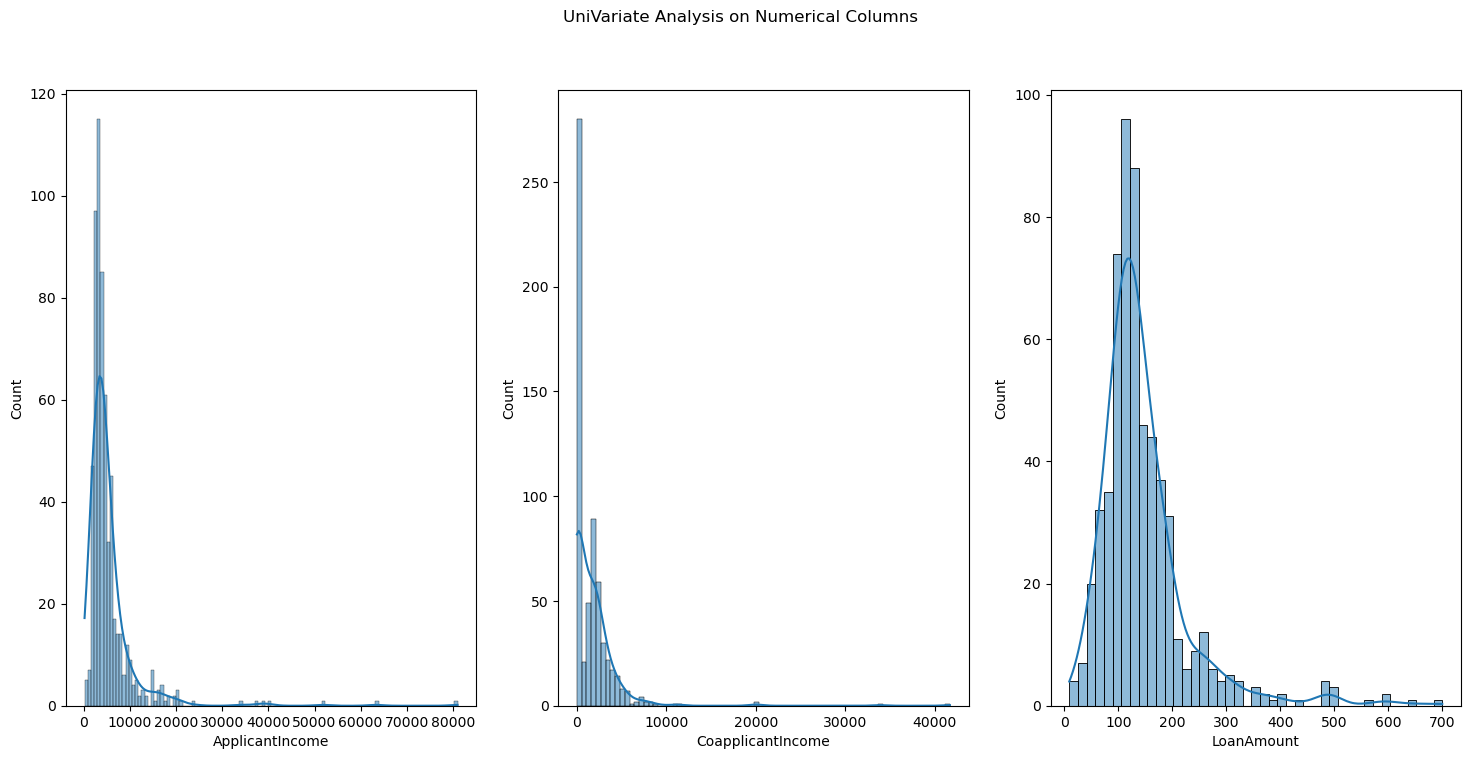

In [28]:
plt.rcParams['figure.figsize'] = (18,8)

plt.subplot(1,3,1)
sns.histplot(data['ApplicantIncome'], kde = True)

plt.subplot(1,3,2)
sns.histplot(data['CoapplicantIncome'], kde = True)

plt.subplot(1,3,3)
sns.histplot(data['LoanAmount'], kde = True)

plt.suptitle("UniVariate Analysis on Numerical Columns")
plt.show()

* It is right skewed 

In [29]:
data[contineous].skew()
# all are right skewed

ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.677552
dtype: float64

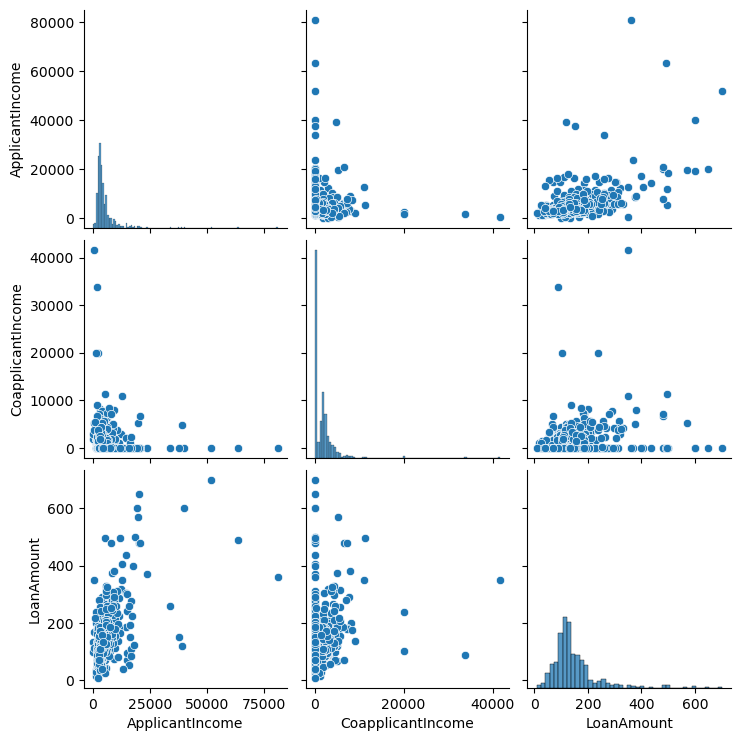

In [30]:
sns.pairplot(data[contineous])
plt.show()

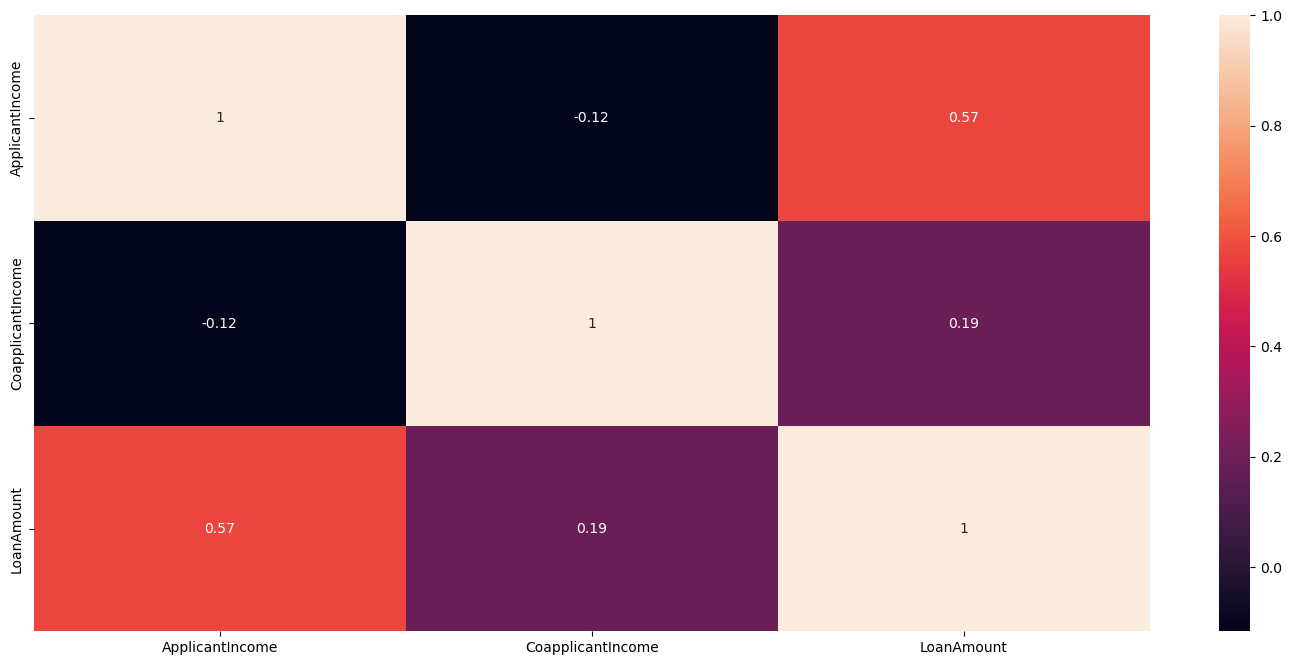

In [31]:
sns.heatmap(data[contineous].corr(), annot = True)
plt.show()

#### Checking the outliers forr all these three things

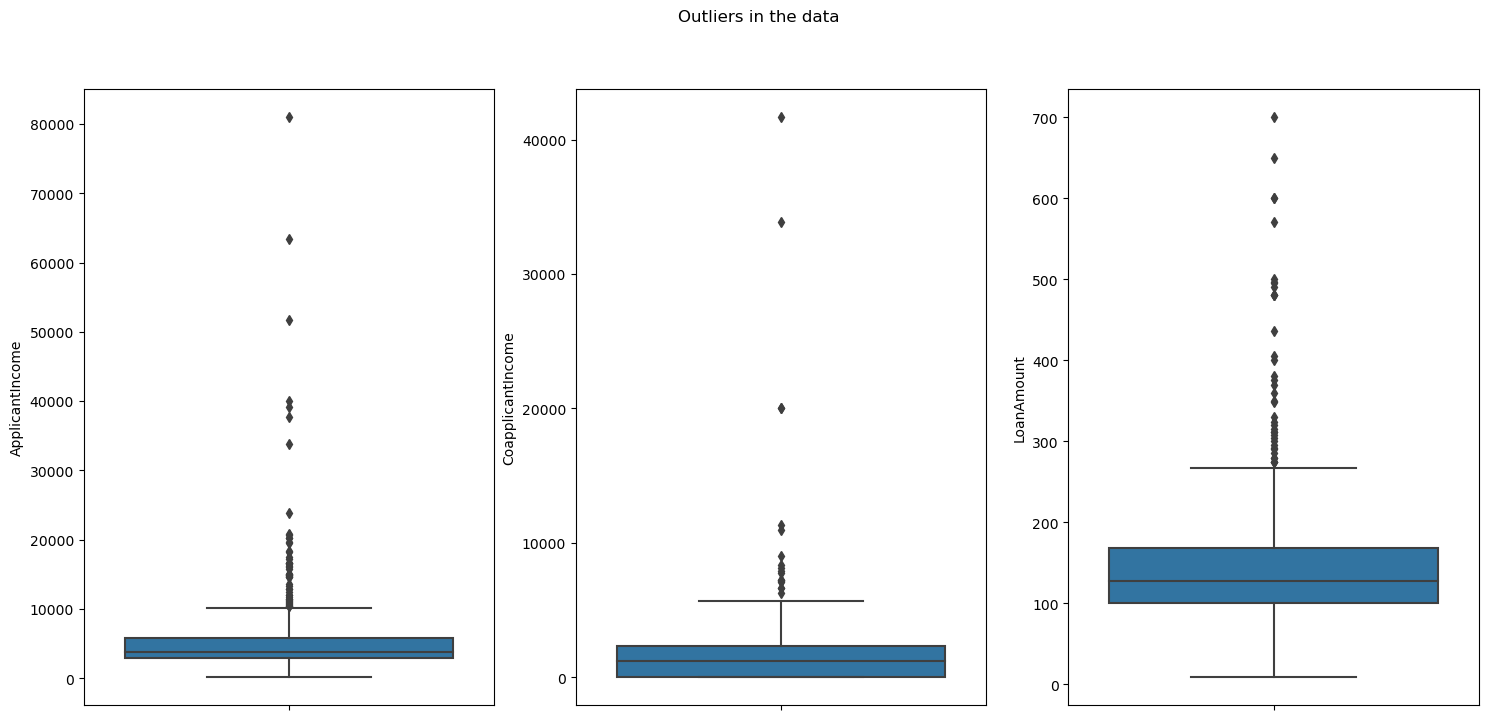

In [32]:
plt.subplot(1,3,1)
sns.boxplot(y = data['ApplicantIncome'])

plt.subplot(1,3,2)
sns.boxplot(y = data['CoapplicantIncome'])

plt.subplot(1,3,3)
sns.boxplot(y = data['LoanAmount'])

plt.suptitle('Outliers in the data')
plt.show()

# these three columns are having the outliers

### For discrete Variables

In [33]:
data[discrete_categorical].describe()

,Credit_History
count,564.000000
mean,0.842199
std,0.364878
min,0.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,1.000000


In [34]:
data[discrete_categorical].describe(include = 'all')

,Gender,Married,Education,Self_Employed,Credit_History,Property_Area,Loan_Status
count,601,611,614,582,564.000000,614,614
unique,2,2,2,2,NaN,3,2
top,Male,Yes,Graduate,No,NaN,Semiurban,Y
freq,489,398,480,500,NaN,233,422
mean,NaN,NaN,NaN,NaN,0.842199,NaN,NaN
std,NaN,NaN,NaN,NaN,0.364878,NaN,NaN
min,NaN,NaN,NaN,NaN,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,1.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,1.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,1.000000,NaN,NaN


In [35]:
data.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

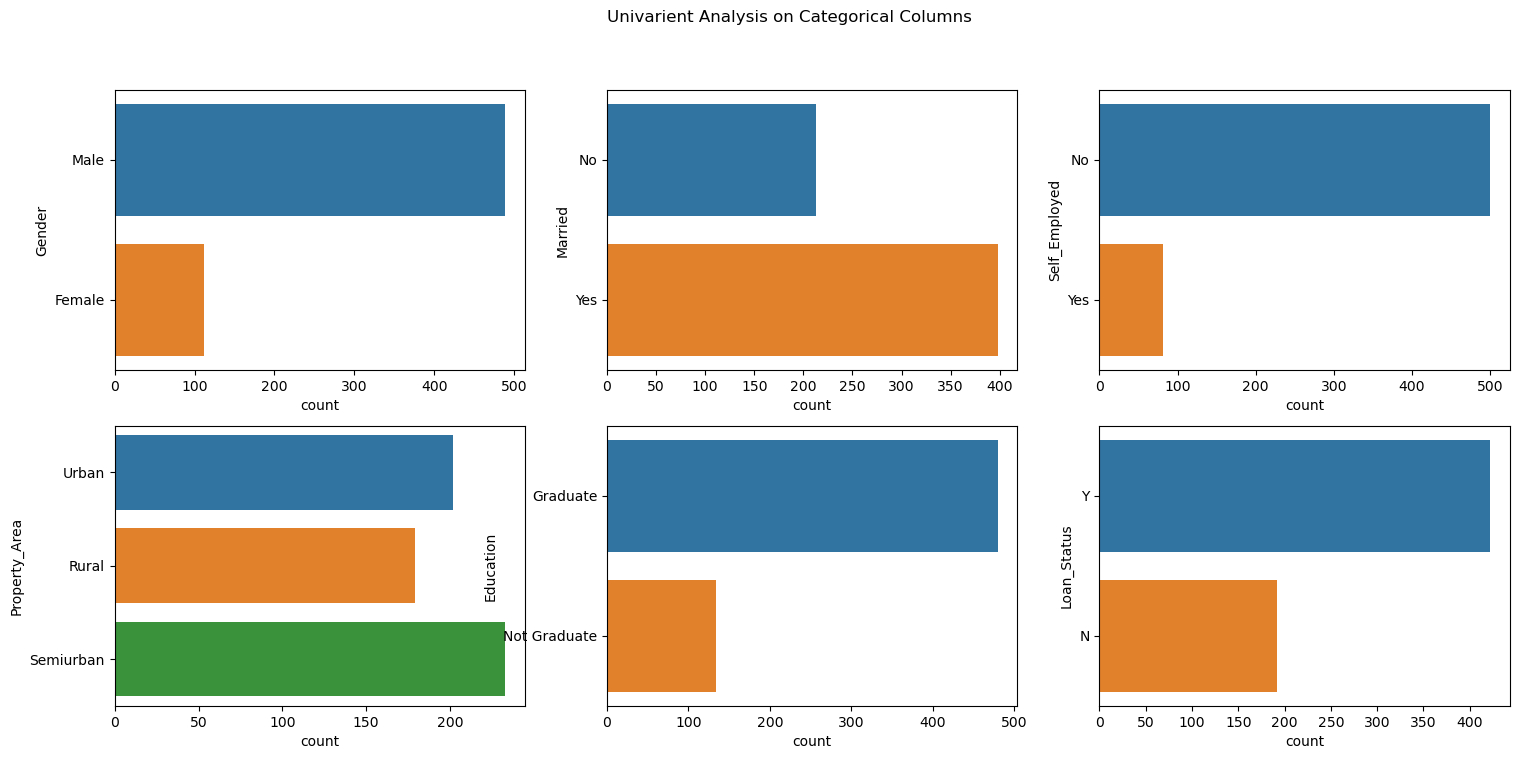

In [36]:
plt.rcParams['figure.figsize'] = (18,8)

plt.subplot(2, 3, 1)
sns.countplot(y = data['Gender'])

plt.subplot(2, 3, 2)
sns.countplot(y = data['Married'])

plt.subplot(2,3,3)
sns.countplot(y = data['Self_Employed'])

plt.subplot(2,3,4)
sns.countplot(y = data['Property_Area'])

plt.subplot(2,3,5)
sns.countplot(y = data['Education'])

plt.subplot(2,3,6)
sns.countplot(y = data['Loan_Status'])

plt.suptitle("Univarient Analysis on Categorical Columns")
plt.show()

# Data Preparation

In [37]:
data['Income'] = data['ApplicantIncome'] + data['CoapplicantIncome']

data.drop(columns = ['ApplicantIncome','CoapplicantIncome'], inplace = True)

#### Modifying the wrong data 

In [38]:
data['Dependents'].replace({'3+':3}, inplace = True)

#### Missing values treatment

In [39]:
# Checking the number of missing values
data.isnull().sum()

Gender              13
Married              3
Dependents          15
Education            0
Self_Employed       32
LoanAmount          22
Loan_Amount_Term    14
Credit_History      50
Property_Area        0
Loan_Status          0
Income               0
dtype: int64

In [40]:
(data.isna().sum()*100)/len(data)

Gender              2.117264
Married             0.488599
Dependents          2.442997
Education           0.000000
Self_Employed       5.211726
LoanAmount          3.583062
Loan_Amount_Term    2.280130
Credit_History      8.143322
Property_Area       0.000000
Loan_Status         0.000000
Income              0.000000
dtype: float64

In [41]:
data = data.dropna(subset = ['Income','LoanAmount','Loan_Amount_Term','Credit_History'])
data.isna().sum()

Gender              12
Married              2
Dependents          12
Education            0
Self_Employed       25
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
Income               0
dtype: int64

In [42]:
data['Dependents'].fillna(0, inplace = True)

In [43]:
data['Gender'].fillna(data.Gender.mode()[0], inplace = True)
data['Married'].fillna(data['Married'].mode()[0], inplace = True)
data['Self_Employed'].fillna(data['Self_Employed'].mode()[0], inplace = True)

In [44]:
data.isna().sum()

Gender              0
Married             0
Dependents          0
Education           0
Self_Employed       0
LoanAmount          0
Loan_Amount_Term    0
Credit_History      0
Property_Area       0
Loan_Status         0
Income              0
dtype: int64

#### Outlier Treatment
#### Encoding

In [45]:
data['Self_Employed'].replace({'No':0,'Yes':1}, inplace = True)
data['Education'].replace({'Graduate':1,'Not Graduate':0}, inplace = True)
data['Gender'] = data['Gender'].map({'Male':1, 'Female':0}).astype('int')
data['Married'] = data['Married'].map({'Yes':1,'No':0}).astype('int')
data['Property_Area'] = data['Property_Area'].map({'Rural':0,'Semiurban':1,'Urban':2}).astype('int')

In [46]:
data['Loan_Status'] = data['Loan_Status'].map({'Y':1,'N':0}).astype('int')

In [47]:
data['Dependents'].replace({'3+':3}, inplace = True)
data.Dependents.unique()

array(['1', '0', '2', 3, 0], dtype=object)

In [48]:
data.dtypes

Gender                int32
Married               int32
Dependents           object
Education             int64
Self_Employed         int64
LoanAmount          float64
Loan_Amount_Term    float64
Credit_History      float64
Property_Area         int32
Loan_Status           int32
Income              float64
dtype: object

In [49]:
data['Dependents'] = data['Dependents'].astype('int')
data['Loan_Amount_Term'] = data['Loan_Amount_Term'].astype('int')

In [50]:
data.dtypes

Gender                int32
Married               int32
Dependents            int32
Education             int64
Self_Employed         int64
LoanAmount          float64
Loan_Amount_Term      int32
Credit_History      float64
Property_Area         int32
Loan_Status           int32
Income              float64
dtype: object

#### Tranformations

In [51]:
data[['Income','LoanAmount']].skew()

Income        5.777628
LoanAmount    2.607945
dtype: float64

In [52]:
from scipy.stats import boxcox
data['Income'], a = boxcox(data['Income'])
data['LoanAmount'], c = boxcox(data['LoanAmount'])

In [53]:
data[['Income','LoanAmount']].skew()

Income       -0.027769
LoanAmount    0.038289
dtype: float64

In [54]:
data['Loan_Amount_Term'] = data['Loan_Amount_Term']/12

In [55]:
data

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income
1,1,1,1,1,0,6.243267,30.0,1.0,0,0,1.864967
2,1,1,0,1,1,5.202610,30.0,1.0,2,1,1.856556
3,1,1,0,0,0,6.138816,30.0,1.0,2,1,1.862802
4,1,0,0,1,0,6.401083,30.0,1.0,2,1,1.864819
5,1,1,2,1,1,7.481930,30.0,1.0,2,1,1.868932
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,1,0,5.313992,30.0,1.0,0,1,1.856069
610,1,1,3,1,0,4.460305,15.0,1.0,0,1,1.860675
611,1,1,1,1,0,7.388070,30.0,1.0,2,1,1.867771
612,1,1,2,1,0,6.870558,30.0,1.0,2,1,1.866991


In [56]:
# Taking the x & y variable 
X = data.drop('Loan_Status', axis = 1)
y = data['Loan_Status']

#### Identify the best random state number

In [68]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

# Assuming X and y are defined somewhere before this code snippet

Train = []
Test = []
CV = []

for i in range(0, 101):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=i)

    log_default = LogisticRegression(random_state=42)  # Set a fixed random state for reproducibility
    log_default.fit(X_train, y_train)

    ypred_train = log_default.predict(X_train)
    ypred_test = log_default.predict(X_test)

    Train.append(accuracy_score(y_train, ypred_train))
    Test.append(accuracy_score(y_test, ypred_test))

    cv_scores = cross_val_score(log_default, X_train, y_train, cv=5, scoring='accuracy')
    CV.append(cv_scores.mean())  # Use the mean of cross-validation scores

em = pd.DataFrame({'Train': Train, "Test": Test, "CV": CV})
gm = em[(abs(em['Train'] - em['Test']) <= 0.05) & (abs(em['Test'] - em['CV']) <= 0.05)]

if not gm.empty:
    rs = gm[gm['CV'] == gm['CV'].max()].index.to_list()[0]
    print("Best Random_state number:", rs)
else:
    print("No suitable random state found.")


Best Random_state number: 70


#### train_test_split

In [58]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y , test_size = 0.2, random_state = 70)

# Step 4, 5: Machine Learning Modelling & Evalution
#### 1. Logistic Regression

In [59]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression()
log_model.fit(X_train, y_train)

ypred_train = log_model.predict(X_train)
ypred_test = log_model.predict(X_test)

print("Train Accuracy :", accuracy_score(y_train, ypred_train))
print("Test ACcuracy :", accuracy_score(y_test, ypred_test))
print("Cross Validation Score :", cross_val_score(log_model, X_train, y_train, cv = 5, scoring = 'accuracy'))

Train Accuracy : 0.8226950354609929
Test ACcuracy : 0.7830188679245284
Cross Validation Score : [0.82352941 0.8        0.81176471 0.83333333 0.8452381 ]


* **Logistic Regression - Good Model**
#### 2. KNN

In [60]:
from sklearn.neighbors import KNeighborsClassifier

estimator = KNeighborsClassifier()
param_grid = {'n_neighbors':list(range(1, 50))}

from sklearn.model_selection import GridSearchCV
knn_grid = GridSearchCV(estimator, param_grid, scoring= 'accuracy', cv = 5)
knn_grid.fit(X_train, y_train)

print("Getting the best neighbors for checking whether it is within the limit / not :",
      knn_grid.best_estimator_)

knn_model = knn_grid.best_estimator_

ypred_train = knn_model.predict(X_train)
ypred_test = knn_model.predict(X_test)

print("Train Accuracy :", accuracy_score(y_train, ypred_train))
print("Test ACcuracy :", accuracy_score(y_test, ypred_test))
print("Cross Validation Score :", cross_val_score(knn_model, X_train, y_train, cv = 5, scoring = 'accuracy'))

Getting the best neighbors for checking whether it is within the limit / not : KNeighborsClassifier(n_neighbors=13)
Train Accuracy : 0.7541371158392435
Test ACcuracy : 0.7075471698113207
Cross Validation Score : [0.72941176 0.74117647 0.74117647 0.73809524 0.73809524]


#### 3. Support Vector Machine (SVM)

In [61]:
from sklearn.svm import SVC
estimator = SVC()

param_grid = {'C':[0.01, 0.1, 1], 'kernel':['linear','rbf','sigmoid','poly']}

from sklearn.model_selection import GridSearchCV
svm_grid = GridSearchCV(estimator, param_grid, scoring = 'accuracy', cv = 5)
svm_grid.fit(X_train, y_train)

svm_model = svm_grid.best_estimator_

ypred_train = svm_model.predict(X_train)
ypred_test = svm_model.predict(X_test)

print("Train Accuracy :", accuracy_score(y_train , ypred_train))
print("Test Accuract :", accuracy_score(y_test, ypred_test))
print("Cross Validation Score :", cross_val_score(svm_model, X_train, y_train , cv = 5, scoring = 'accuracy'))

Train Accuracy : 0.8226950354609929
Test Accuract : 0.7830188679245284
Cross Validation Score : [0.82352941 0.8        0.81176471 0.83333333 0.8452381 ]


#### 4. Decision Tree Classifier
Steps:
* Apply the hyperparameter tuning & identify the best model.
* Using the best model identify the important features of each column.
* In the feature importance identify the important features where the importance greator than 0.
* Create a new data set with important features only.
* Train with best model and important features
* Evaluate the best model

In [62]:
from sklearn.tree import DecisionTreeClassifier

estimator = DecisionTreeClassifier(random_state = 70)
param_grid = {'criterion':['gini','entropy'],
             'max_depth':list(range(1,16))}

from sklearn.model_selection import GridSearchCV
dt_grid = GridSearchCV(estimator, param_grid, scoring = 'accuracy', cv = 5)
dt_grid.fit(X_train, y_train)

dt = dt_grid.best_estimator_
dt_fi = dt.feature_importances_

index = [i for i, x in enumerate(dt_fi) if x> 0]


X_train_dt = X_train.iloc[:, index]
X_test_dt = X_test.iloc[:, index]

dt.fit(X_train_dt , y_train)

ypred_train = dt.predict(X_train_dt)
ypred_test = dt.predict(X_test_dt)

print("Train Accuracy :", accuracy_score(y_train, ypred_train))
print("Test ACcuracy :", accuracy_score(y_test, ypred_test))
print("Cross Validation Score :", cross_val_score(dt, X_train, y_train, cv = 5, scoring = 'accuracy').mean())



Train Accuracy : 0.8226950354609929
Test ACcuracy : 0.7830188679245284
Cross Validation Score : 0.8227731092436976


#### 5. Random Forest Classifier

In [63]:
from sklearn.ensemble import RandomForestClassifier

estimator = RandomForestClassifier(random_state = 70)
param_grid = {'n_estimators':list(range(1,16))}

from sklearn.model_selection import GridSearchCV
rf_grid = GridSearchCV(estimator, param_grid, scoring = 'accuracy', cv = 5)
rf_grid.fit(X_train, y_train)

rf = rf_grid.best_estimator_
rf_fi = rf.feature_importances_

index = [i for i, x in enumerate(rf_fi) if x> 0]


X_train_rf = X_train.iloc[:, index]
X_test_rf = X_test.iloc[:, index]

rf.fit(X_train_rf , y_train)

ypred_train = rf.predict(X_train_rf)
ypred_test = rf.predict(X_test_rf)

print("Train Accuracy :", accuracy_score(y_train, ypred_train))
print("Test ACcuracy :", accuracy_score(y_test, ypred_test))
print("Cross Validation Score :", cross_val_score(rf, X_train, y_train, cv = 5, scoring = 'accuracy').mean())

Train Accuracy : 0.9952718676122931
Test ACcuracy : 0.7547169811320755
Cross Validation Score : 0.8038375350140056


#### 6. AdaBoost

In [64]:
from sklearn.ensemble import AdaBoostClassifier

estimator = RandomForestClassifier(random_state = 70)
param_grid = {'n_estimators':list(range(1,51))}

from sklearn.model_selection import GridSearchCV
ab_grid = GridSearchCV(estimator, param_grid, scoring = 'accuracy', cv = 5)
ab_grid.fit(X_train, y_train)

ab = ab_grid.best_estimator_
ab_fi = ab.feature_importances_

index = [i for i, x in enumerate(ab_fi) if x> 0]


X_train_ab = X_train.iloc[:, index]
X_test_ab = X_test.iloc[:, index]

ab.fit(X_train_ab , y_train)

ypred_train = ab.predict(X_train_ab)
ypred_test = ab.predict(X_test_ab)

print("Train Accuracy :", accuracy_score(y_train, ypred_train))
print("Test ACcuracy :", accuracy_score(y_test, ypred_test))
print("Cross Validation Score :", cross_val_score(ab, X_train, y_train, cv = 5, scoring = 'accuracy').mean())



Train Accuracy : 0.9905437352245863
Test ACcuracy : 0.7641509433962265
Cross Validation Score : 0.8063025210084034


#### 7. GradientBoost

In [65]:
from sklearn.ensemble import GradientBoostingClassifier

estimator = GradientBoostingClassifier(random_state = 70)
param_grid = {'n_estimators':list(range(1,10)), 'learning_rate':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]}

from sklearn.model_selection import GridSearchCV
gb_grid = GridSearchCV(estimator, param_grid, scoring = 'accuracy', cv = 5)
gb_grid.fit(X_train, y_train)

gb = gb_grid.best_estimator_
gb_fi = gb.feature_importances_

index = [i for i, x in enumerate(gb_fi) if x> 0]


X_train_gb = X_train.iloc[:, index]
X_test_gb = X_test.iloc[:, index]

gb.fit(X_train_gb , y_train)

ypred_train = gb.predict(X_train_gb)
ypred_test = gb.predict(X_test_gb)

print("Train Accuracy :", accuracy_score(y_train, ypred_train))
print("Test ACcuracy :", accuracy_score(y_test, ypred_test))
print("Cross Validation Score :", cross_val_score(gb, X_train, y_train, cv = 5, scoring = 'accuracy').mean())



Train Accuracy : 0.8747044917257684
Test ACcuracy : 0.7358490566037735
Cross Validation Score : 0.8252100840336135


#### 8. XGBoost

In [66]:
from xgboost import XGBClassifier

estimator = XGBClassifier(random_state = 70)
param_grid = {'n_estimators':[10,20,40,100], 'max_depth':[3,4,5], 'gamma':[0,0.15,0.3,0.45,0.6,0.75,0.90]}

from sklearn.model_selection import GridSearchCV
xgb_grid = GridSearchCV(estimator, param_grid, scoring = 'accuracy', cv = 5)
xgb_grid.fit(X_train, y_train)

xgb = xgb_grid.best_estimator_
xgb_fi = xgb.feature_importances_

index = [i for i, x in enumerate(xgb_fi) if x> 0]


X_train_xgb = X_train.iloc[:, index]
X_test_xgb = X_test.iloc[:, index]

xgb.fit(X_train_xgb , y_train)

ypred_train = xgb.predict(X_train_xgb)
ypred_test = xgb.predict(X_test_xgb)

print("Train Accuracy :", accuracy_score(y_train, ypred_train))
print("Test ACcuracy :", accuracy_score(y_test, ypred_test))
print("Cross Validation Score :", cross_val_score(xgb, X_train, y_train, cv = 5, scoring = 'accuracy').mean())



Train Accuracy : 0.8557919621749409
Test ACcuracy : 0.7735849056603774
Cross Validation Score : 0.8298599439775911


#### Here SVM , DT aur LR have same accuracy
* we will give the last priority to **SVM & KNN** since it takes the whole lot of time
* Now in **LR & DT** we will use the DT because it just uses the 1 column but LR uses 10 columns so Our Dt model will be best used for predictions
# Final Model : DecisionTreeClassifier

In [67]:
from sklearn.tree import DecisionTreeClassifier

estimator = DecisionTreeClassifier(random_state = 70)
param_grid = {'criterion':['gini','entropy'],
             'max_depth':list(range(1,16))}

from sklearn.model_selection import GridSearchCV
dt_grid = GridSearchCV(estimator, param_grid, scoring = 'accuracy', cv = 5)
dt_grid.fit(X_train, y_train)

dt = dt_grid.best_estimator_
dt_fi = dt.feature_importances_

index = [i for i, x in enumerate(dt_fi) if x> 0]


X_train_dt = X_train.iloc[:, index]
X_test_dt = X_test.iloc[:, index]

dt.fit(X_train_dt , y_train)

ypred_train = dt.predict(X_train_dt)
ypred_test = dt.predict(X_test_dt)

print("Train Accuracy :", accuracy_score(y_train, ypred_train))
print("Test ACcuracy :", accuracy_score(y_test, ypred_test))
print("Cross Validation Score :", cross_val_score(dt, X_train, y_train, cv = 5, scoring = 'accuracy').mean())

Train Accuracy : 0.8226950354609929
Test ACcuracy : 0.7830188679245284
Cross Validation Score : 0.8227731092436976
